# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
#Your code here
from sklearn.cross_validation import train_test_split
X = df[df.columns[:-1]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/matthew/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2. Create a standard logistic regression model

In [3]:
#Your code here
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3. Write a function to calculate the precision

In [4]:
def precision(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return tp/float(tp+fp)

## 4. Write a function to calculate the recall

In [5]:
def recall(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return tp/float(tp+fn)

## 5. Write a function to calculate the accuracy

In [6]:
def accuracy(y_hat, y):
    #Your code here
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [7]:
#Your code here
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print('Training Precision: ', precision(y_hat_train, y_train))
print('Testing Precision: ', precision(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall(y_hat_train, y_train))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Precision:  0.835820895522388
Testing Precision:  0.8125



Training Recall:  0.9180327868852459
Testing Recall:  0.9069767441860465



Training Accuracy:  0.8590308370044053
Testing Accuracy:  0.8289473684210527


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [8]:
import  matplotlib.pyplot  as plt
%matplotlib inline

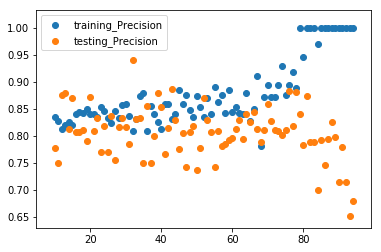

In [10]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend()


Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

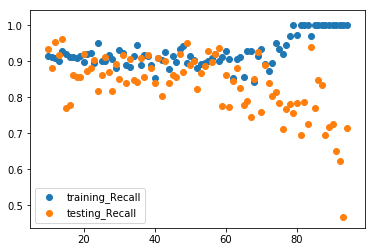

In [11]:
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

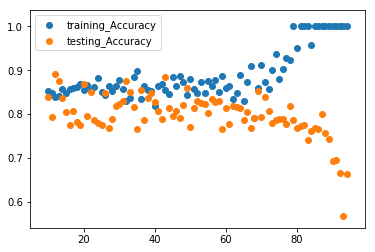

In [12]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

In [ ]:
# code for test and train accuracy

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.